You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [167]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans,vq
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler




In [168]:
#optional
penguin_df = pd.read_csv("penguins.csv")
penguin_df.info()
penguin_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [169]:
#coding for categorical variables
penguin_df.sex = penguin_df.sex.map({'MALE': 0, 'FEMALE': 1})



#select features
X = penguin_df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]

#using standardScaler to scale the feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)



In [170]:
X_scaled.head()

#detecting the optimal number of clusters (Elbow needed)
inertia = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)







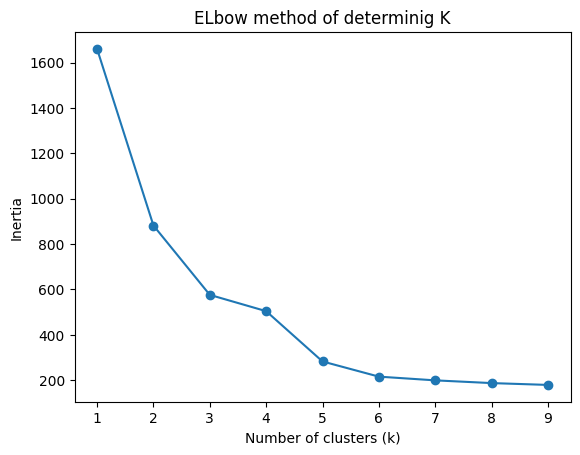

In [171]:
#plot to visualize elbow method of finding k
plt.plot(range(1,10), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('ELbow method of determinig K')

plt.show()

In [172]:
#Run the kmean clustering algorithm
n_cluster = 4
kmeans=KMeans(n_clusters=n_cluster, random_state=42)
penguin_df['clusters']= kmeans.fit_predict(X_scaled)


In [173]:
#create a statistical df
penguin_df.groupby('clusters').mean()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
clusters,,,,,
0,43.878302,19.111321,194.764151,4006.603774,0.0
1,49.473770,15.718033,221.540984,5484.836066,0.0
2,40.217757,17.611215,189.046729,3419.158879,1.0
3,45.563793,14.237931,212.706897,4679.741379,1.0


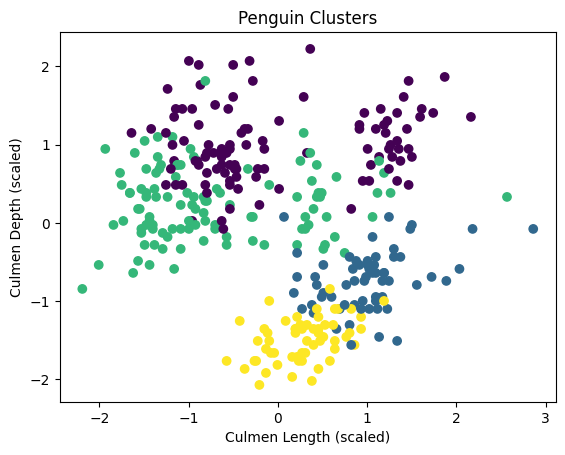

In [174]:
plt.scatter(X_scaled['culmen_length_mm'], X_scaled['culmen_depth_mm'], c=penguin_df['clusters'])
plt.title('Penguin Clusters')
plt.xlabel('Culmen Length (scaled)')
plt.ylabel('Culmen Depth (scaled)')
plt.show()


In [175]:
#checking specie alignment
final_df = penguin_df.copy()
final_df['clusters'] = kmeans.labels_
final_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,clusters
0,39.1,18.7,181.0,3750.0,0,0
1,39.5,17.4,186.0,3800.0,1,2
2,40.3,18.0,195.0,3250.0,1,2
3,36.7,19.3,193.0,3450.0,1,2
4,39.3,20.6,190.0,3650.0,0,0
...,...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,1,3
328,46.8,14.3,215.0,4850.0,1,3
329,50.4,15.7,222.0,5750.0,0,1
330,45.2,14.8,212.0,5200.0,1,3


In [176]:
#cluster-wise-summary
cluster_summary = final_df.groupby('clusters').mean().round(2)
cluster_summary

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
clusters,,,,,
0,43.88,19.11,194.76,4006.60,0.0
1,49.47,15.72,221.54,5484.84,0.0
2,40.22,17.61,189.05,3419.16,1.0
3,45.56,14.24,212.71,4679.74,1.0
